# 📘 Project: Movie Data Exploration
# 🧑‍💻 Author: Arghya Ghosh
# 🔍 Objective: Perform general-purpose EDA, cleaning, and visualization.

## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import rcParams

# Set plot style
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set fallback fonts globally
rcParams['font.family'] = [
    "Segoe UI",
    "Microsoft YaHei",
    "Microsoft JhengHei",
    "Yu Gothic",
    "Malgun Gothic",
    "Segoe UI Emoji"
]

## 2. Load the dataset

In [2]:
df = pd.read_csv('../data/raw/TMDB_all_movies.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.111,346.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Turo Pajala, Matti Jaaranen, Marja Packalén, J...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,9132.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.293,409.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Esko Nikkari, Mari Rantasila, Marina Martinoff...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.4,7955.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.900,2687.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Lana McKissack, Madonna, Patricia Vonne, Bruce...","Quentin Tarantino, Robert Rodriguez, Allison A...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Quentin Tarantino, Robert Rodriguez, Allison A...","Quentin Tarantino, Lawrence Bender, Alexandre ...",Combustible Edison,6.7,113993.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.458,349.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Stephen Dorff, Deirdre Kelly, Emilio Estevez, ...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri,6.6,19867.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.500,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


## 3. Basic info

In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085139 entries, 0 to 1085138
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1085139 non-null  int64  
 1   title                    1085126 non-null  object 
 2   vote_average             1085137 non-null  float64
 3   vote_count               1085137 non-null  float64
 4   status                   1085137 non-null  object 
 5   release_date             961060 non-null   object 
 6   revenue                  1085137 non-null  float64
 7   runtime                  1085137 non-null  float64
 8   budget                   1085137 non-null  float64
 9   imdb_id                  614871 non-null   object 
 10  original_language        1085137 non-null  object 
 11  original_title           1085127 non-null  object 
 12  overview                 890346 non-null   object 
 13  popularity               1085137 non-null 

id                              0
title                          13
vote_average                    2
vote_count                      2
status                          2
release_date               124079
revenue                         2
runtime                         2
budget                          2
imdb_id                    470268
original_language               2
original_title                 12
overview                   194793
popularity                      2
tagline                    920805
genres                     310593
production_companies       580272
production_countries       429230
spoken_languages           414333
cast                       357302
director                   193606
director_of_photography    817850
writers                    554127
producers                  733862
music_composer             975195
imdb_rating                640134
imdb_votes                 640134
poster_path                301789
dtype: int64

## 4. Data cleaning

In [4]:
print("\n📊 Cleaning data...")
print(f"📄 Initial rows: {df.shape[0]}")

# Drop rows with adult content
# df = df[df["adult"] == False]
# print(f"🧼 After dropping adult content: {df.shape[0]} rows")

# Drop duplicates
df = df.drop_duplicates(subset=["title", "overview"])
print(f"🧽 After dropping duplicates: {df.shape[0]} rows")

# Convert dates
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Fill NA with 0 or empty string where appropriate
df['revenue'] = df['revenue'].fillna(0)
df['budget'] = df['budget'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)

# Reset index
df = df.reset_index(drop=True)


📊 Cleaning data...
📄 Initial rows: 1085139
🧽 After dropping duplicates: 1075829 rows


## 5. Top 10 highest grossing movies

In [5]:
top_grossing = df.sort_values(by='revenue', ascending=False).head(10)
top_grossing[['title', 'revenue']]

,title,revenue
1026624,babben: the movie,5.000000e+09
911144,TikTok Rizz Party,3.000000e+09
12046,Avatar,2.923706e+09
183353,Avengers: Endgame,2.799439e+09
53876,Avatar: The Way of Water,2.320250e+09
471,Titanic,2.264162e+09
694950,Ne Zha 2,2.150000e+09
88979,Star Wars: The Force Awakens,2.068224e+09
183355,Avengers: Infinity War,2.052415e+09
996551,蜘蛛侠：英雄无归,1.921847e+09


## 6. Revenue vs Budget scatter plot

Text(0, 0.5, 'Revenue')

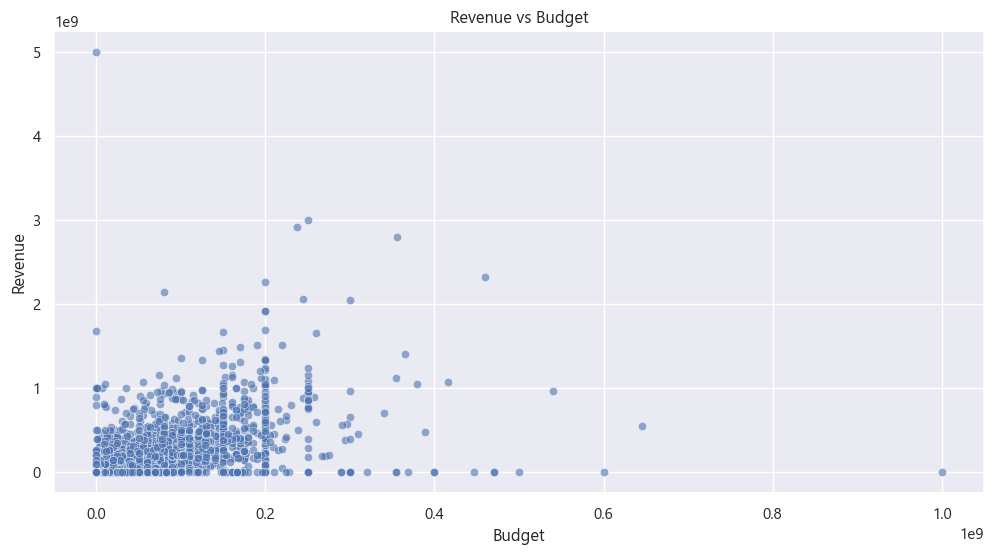

In [6]:
sns.scatterplot(data=df[df['budget'] > 0], x='budget', y='revenue', alpha=0.6)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')

## 7. Movie count by year

<Axes: title={'center': 'Movies Released per Year'}, xlabel='year'>

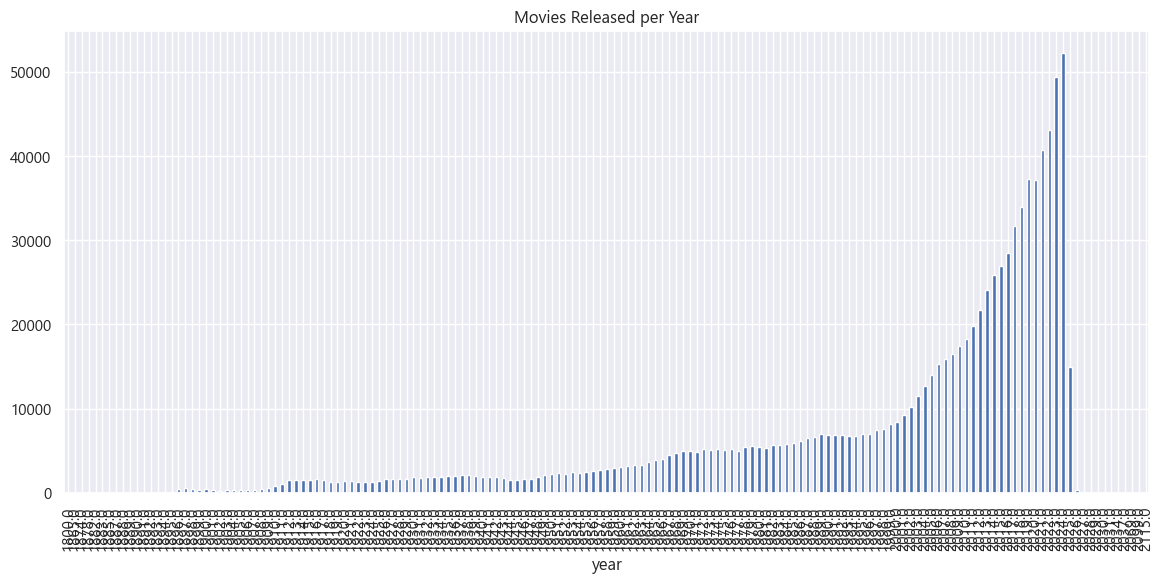

In [7]:
df['year'] = df['release_date'].dt.year

# set max and min year for x-axis
plt.xlim(df['year'].min(), df['year'].max())

# Plotting the number of movies released per year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(14,6), title='Movies Released per Year')

## 8. Most common genres

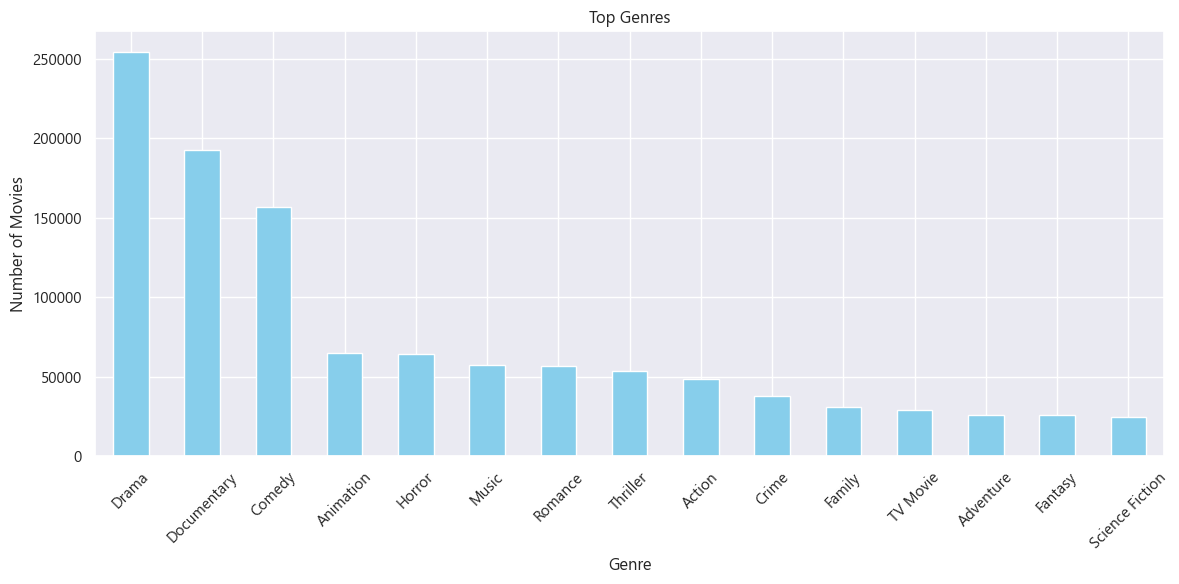

In [8]:
def parse_genres(genres_str):
    if not isinstance(genres_str, str) or genres_str.strip() == "":
        return []
    return [g.strip() for g in genres_str.split(',')]

# Apply parsing to your dataframe
df['genres_list'] = df['genres'].apply(parse_genres)

# Explode the genres list to create a flat structure
all_genres = df['genres_list'].explode()

# Plot if not empty
if not all_genres.empty:
    top_genres = all_genres.value_counts().head(15)
    top_genres.plot(kind='bar', title='Top Genres', color='skyblue')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No genres available to plot.")

## 9. WordCloud of movie overviews

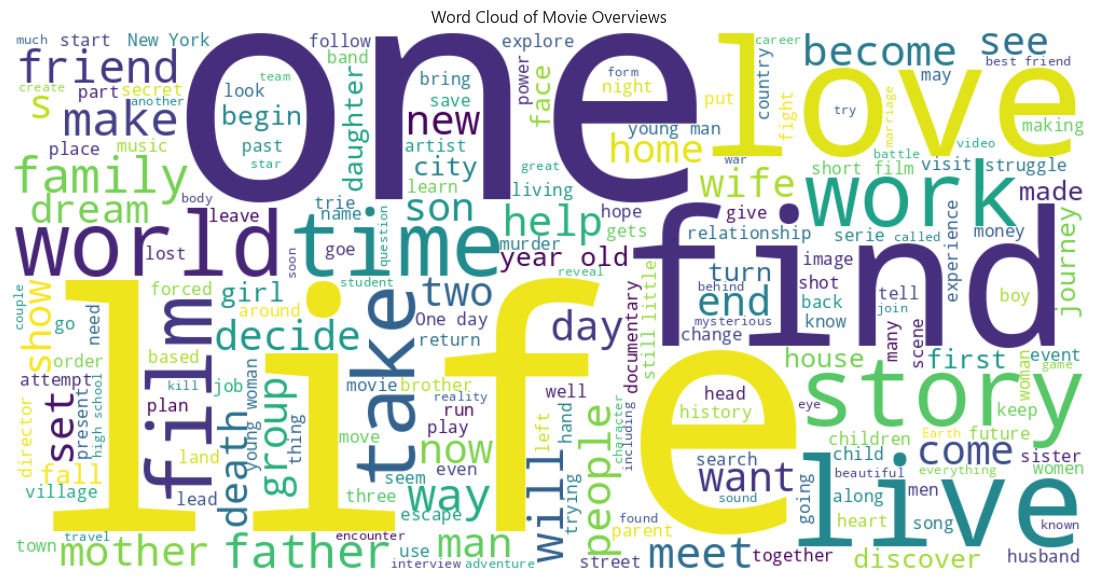

In [9]:
# Combine all overviews into a single string
text = ' '.join(df['overview'].dropna().astype(str).values)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews')
plt.show()

## 10. Correlation heatmap

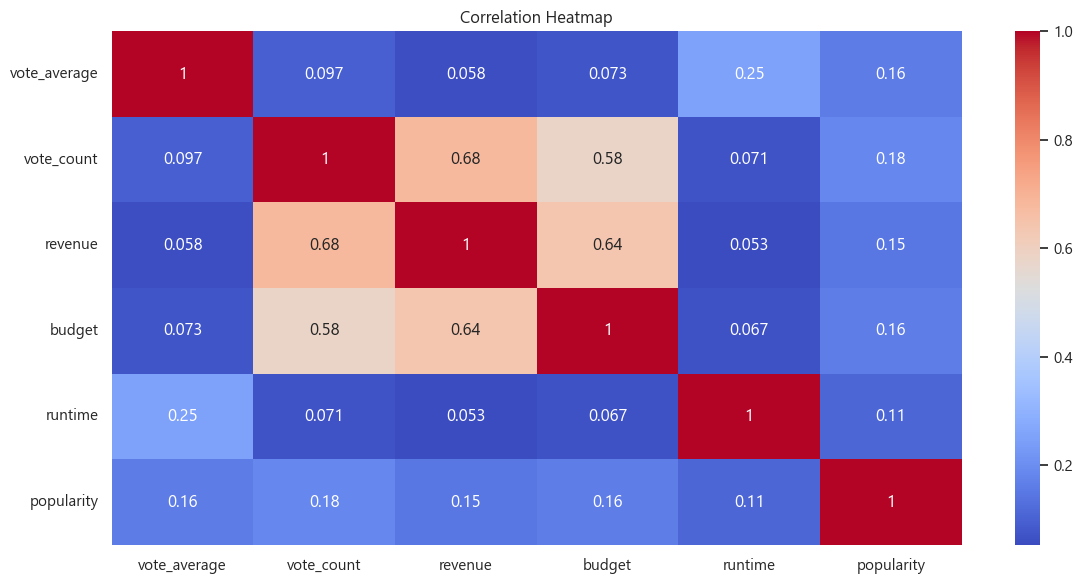

In [10]:
numerics = ['vote_average', 'vote_count', 'revenue', 'budget', 'runtime', 'popularity']
sns.heatmap(df[numerics].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 11. Top 20 Most Voted Movies

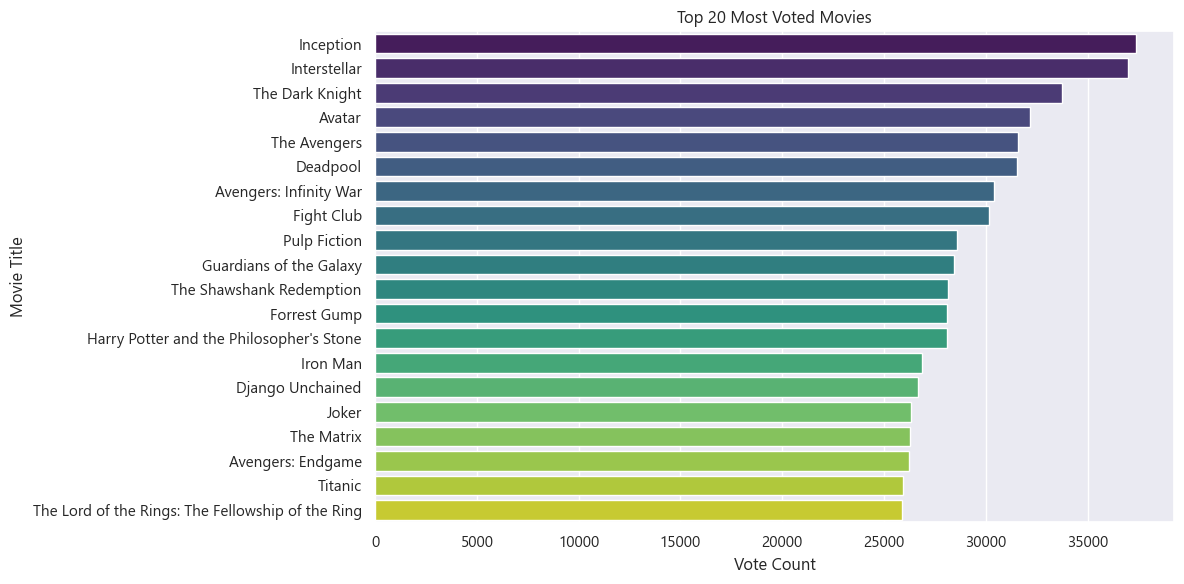

In [11]:
most_voted = df.sort_values(by='vote_count', ascending=False).head(20)
sns.barplot(x='vote_count', y='title', data=most_voted, hue='title', palette='viridis', dodge=False, legend=False)
plt.title('Top 20 Most Voted Movies')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

## 12. Distribution of Movie Runtimes

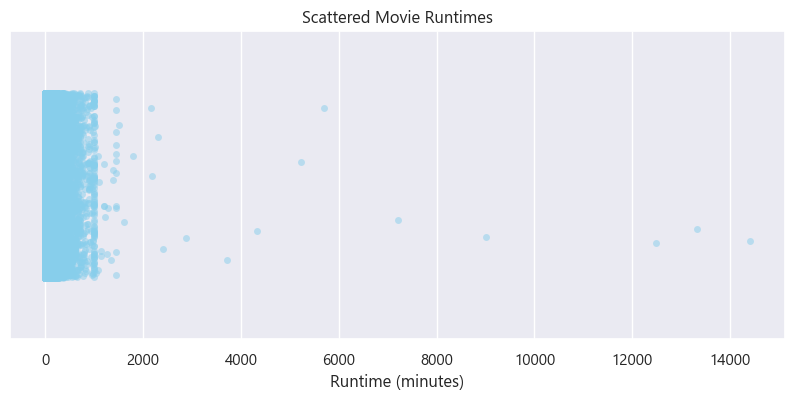

In [12]:
plt.figure(figsize=(10, 4))
sns.stripplot(x='runtime', data=df, color='skyblue', jitter=0.3, alpha=0.5)
plt.title('Scattered Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.yticks([])  # hide y-axis
plt.show()

## 13. Average Ratings by Genre (Top 15)

Text(0.5, 0, 'Genre')

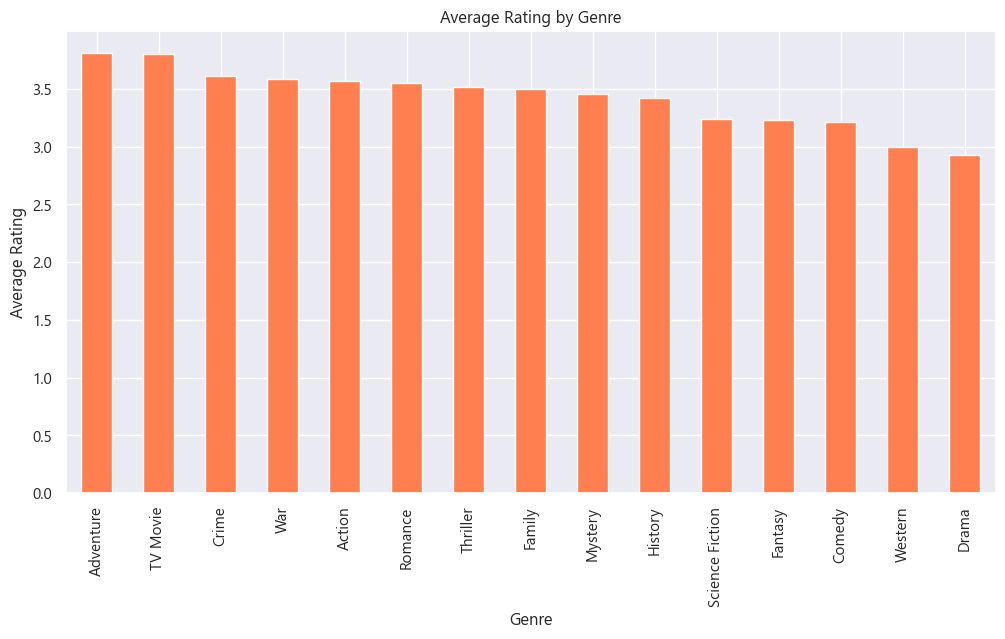

In [13]:
genre_ratings = df.explode('genres_list').groupby('genres_list')['vote_average'].mean().sort_values(ascending=False).head(15)
genre_ratings.plot(kind='bar', color='coral')
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')

## 14. Popularity Over the Years

Text(0, 0.5, 'Average Popularity')

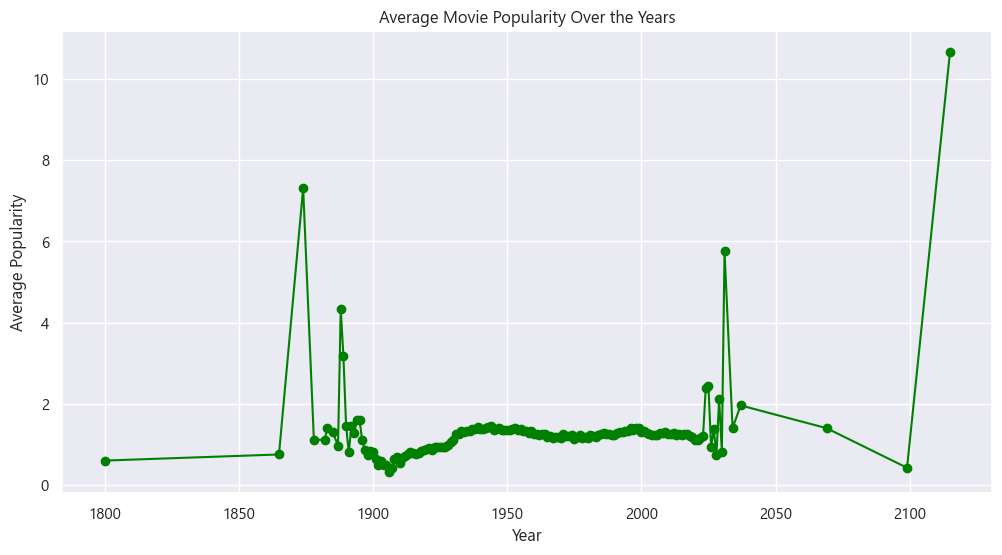

In [14]:
yearly_popularity = df.groupby('year')['popularity'].mean()
yearly_popularity.plot(kind='line', marker='o', color='green')
plt.title('Average Movie Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')

## 15. Budget vs Revenue with Regression Line

Text(0, 0.5, 'Revenue (log scale)')

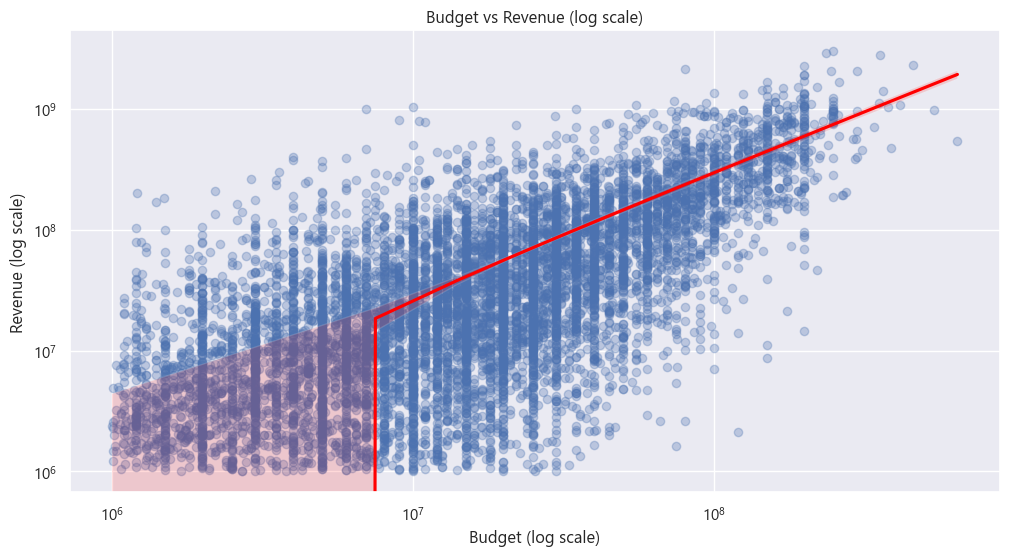

In [15]:
filtered_df = df[(df['budget'] > 1e6) & (df['revenue'] > 1e6)]
sns.regplot(x='budget', y='revenue', data=filtered_df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Budget vs Revenue (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')

## 16. Heatmap of Average Ratings by Year and Genre

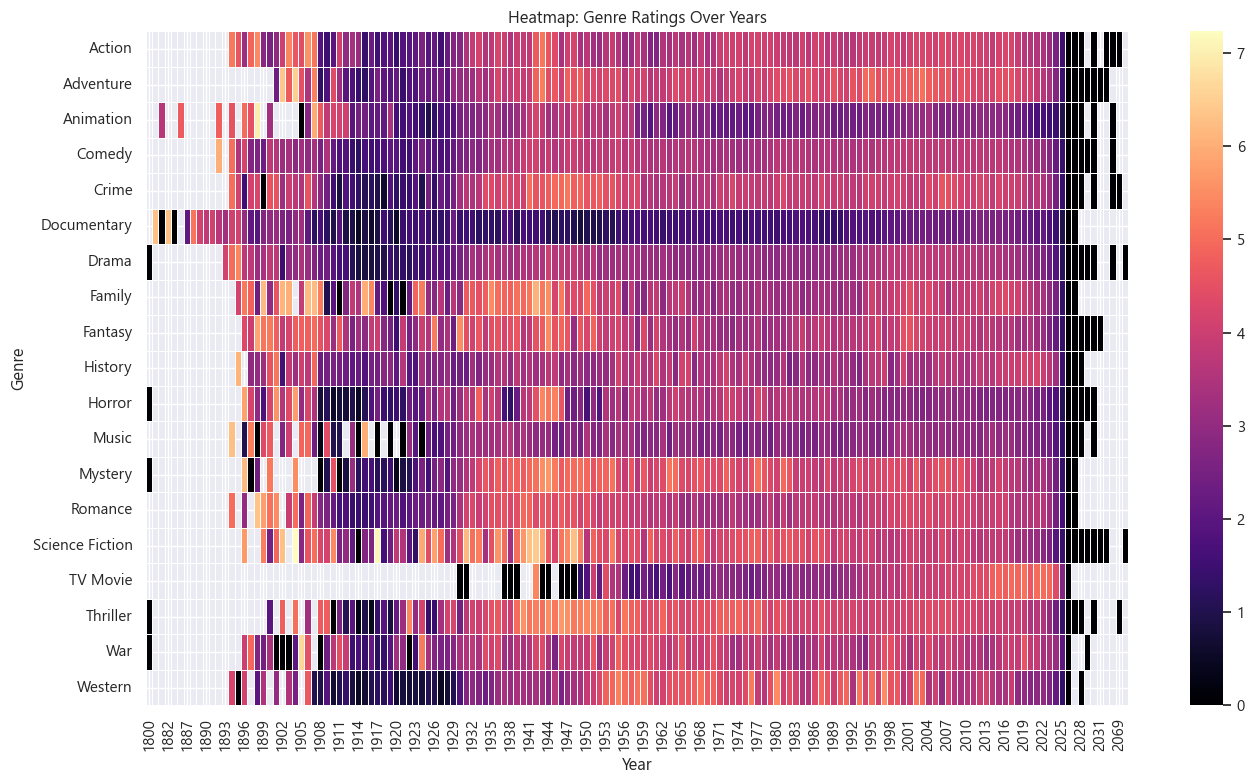

In [16]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year.astype('Int64')

pivot_data = df.explode('genres_list').dropna(subset=['year', 'genres_list'])
heatmap_df = pivot_data.pivot_table(index='genres_list', columns='year', values='vote_average', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_df, cmap='magma', linewidths=0.5)
plt.title('Heatmap: Genre Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 17. Revenue by Production Country (Top 10)

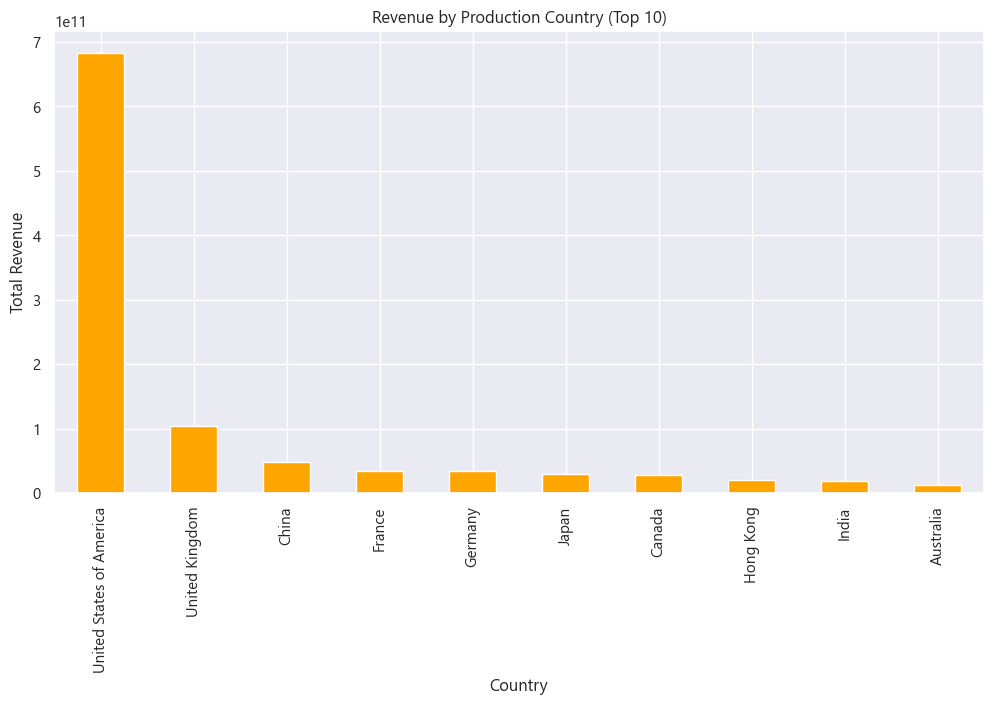

In [17]:
def parse_countries(countries_str):
    if not isinstance(countries_str, str) or countries_str.strip() == "":
        return []
    return [g.strip() for g in countries_str.split(',')]

df['countries_list'] = df['production_countries'].apply(parse_countries)
revenue_by_country = df.explode('countries_list').groupby('countries_list')['revenue'].sum().sort_values(ascending=False).head(10)
revenue_by_country.plot(kind='bar', title='Revenue by Production Country (Top 10)', color='orange')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

## 18. Pie Chart of Language Distribution (Top 10)

Text(0, 0.5, '')

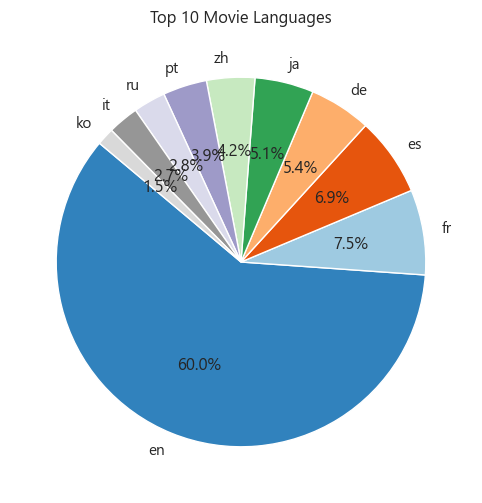

In [18]:
lang_dist = df['original_language'].value_counts().head(10)
lang_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20c')
plt.title('Top 10 Movie Languages')
plt.ylabel('')

## 19. Box Plot of Vote Averages by Decade

Text(0, 0.5, 'Average Vote')

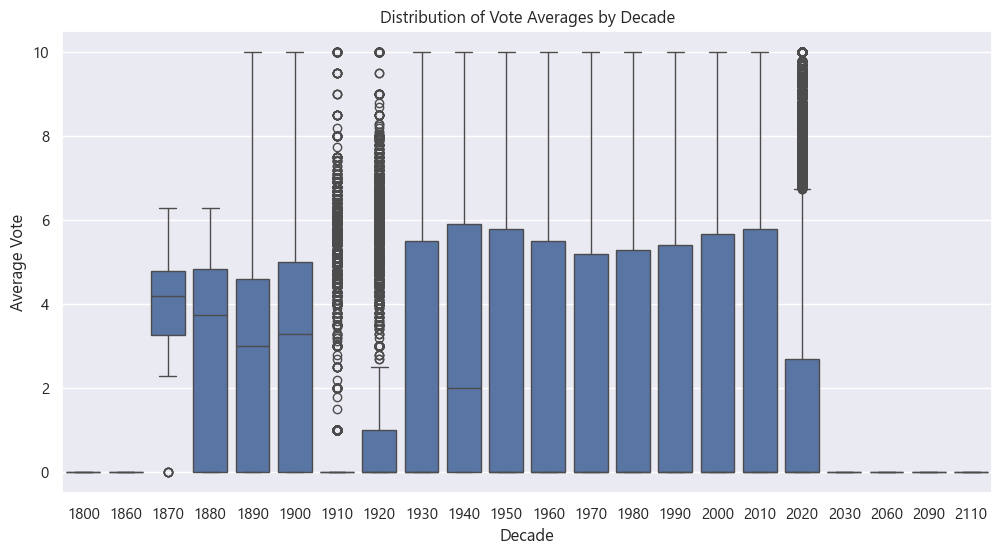

In [19]:
df['decade'] = (df['year'] // 10) * 10
sns.boxplot(x='decade', y='vote_average', data=df)
plt.title('Distribution of Vote Averages by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Vote')

## 20. Revenue per Minute (Efficiency!)

Text(0, 0.5, 'Movie Title')

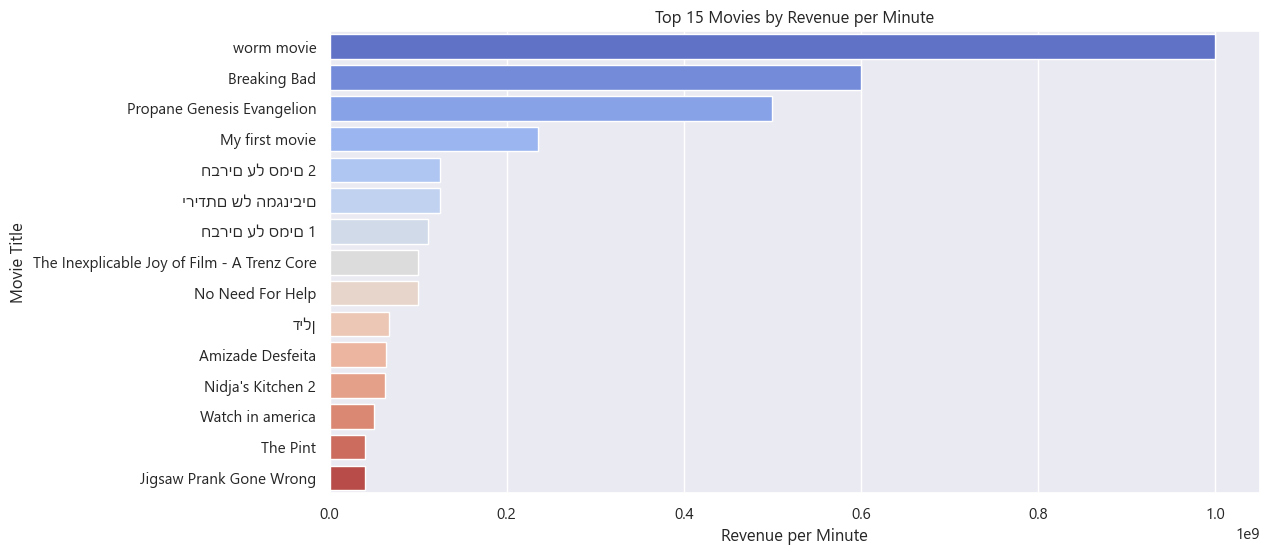

In [20]:
df['revenue_per_minute'] = df['revenue'] / df['runtime']
top_eff = df[df['runtime'] > 0].sort_values(by='revenue_per_minute', ascending=False).head(15)
sns.barplot(x='revenue_per_minute', y='title', hue="title", data=top_eff, palette='coolwarm')
plt.title('Top 15 Movies by Revenue per Minute')
plt.xlabel('Revenue per Minute')
plt.ylabel('Movie Title')

## 21. Bubble Chart: Budget vs Revenue vs Popularity

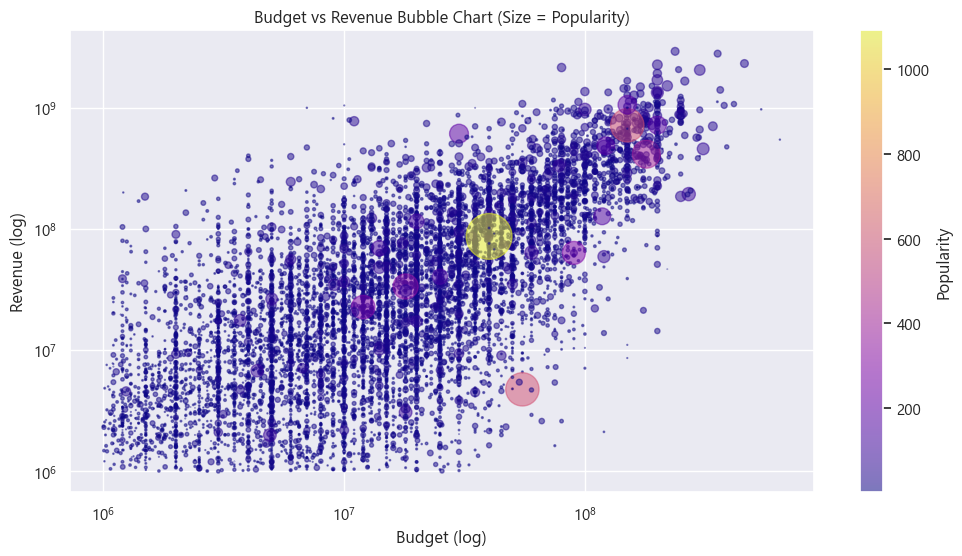

In [21]:
filtered = df[(df['budget'] > 1e6) & (df['revenue'] > 1e6) & (df['popularity'] > 0)]
plt.scatter(filtered['budget'], filtered['revenue'], s=filtered['popularity'], alpha=0.5, c=filtered['popularity'], cmap='plasma')
plt.xscale('log')
plt.yscale('log')
plt.title('Budget vs Revenue Bubble Chart (Size = Popularity)')
plt.xlabel('Budget (log)')
plt.ylabel('Revenue (log)')
plt.colorbar(label='Popularity')

## 22. Pairplot of Core Numerical Features

Text(0.5, 1.02, 'Pairplot of Core Features (Sampled)')

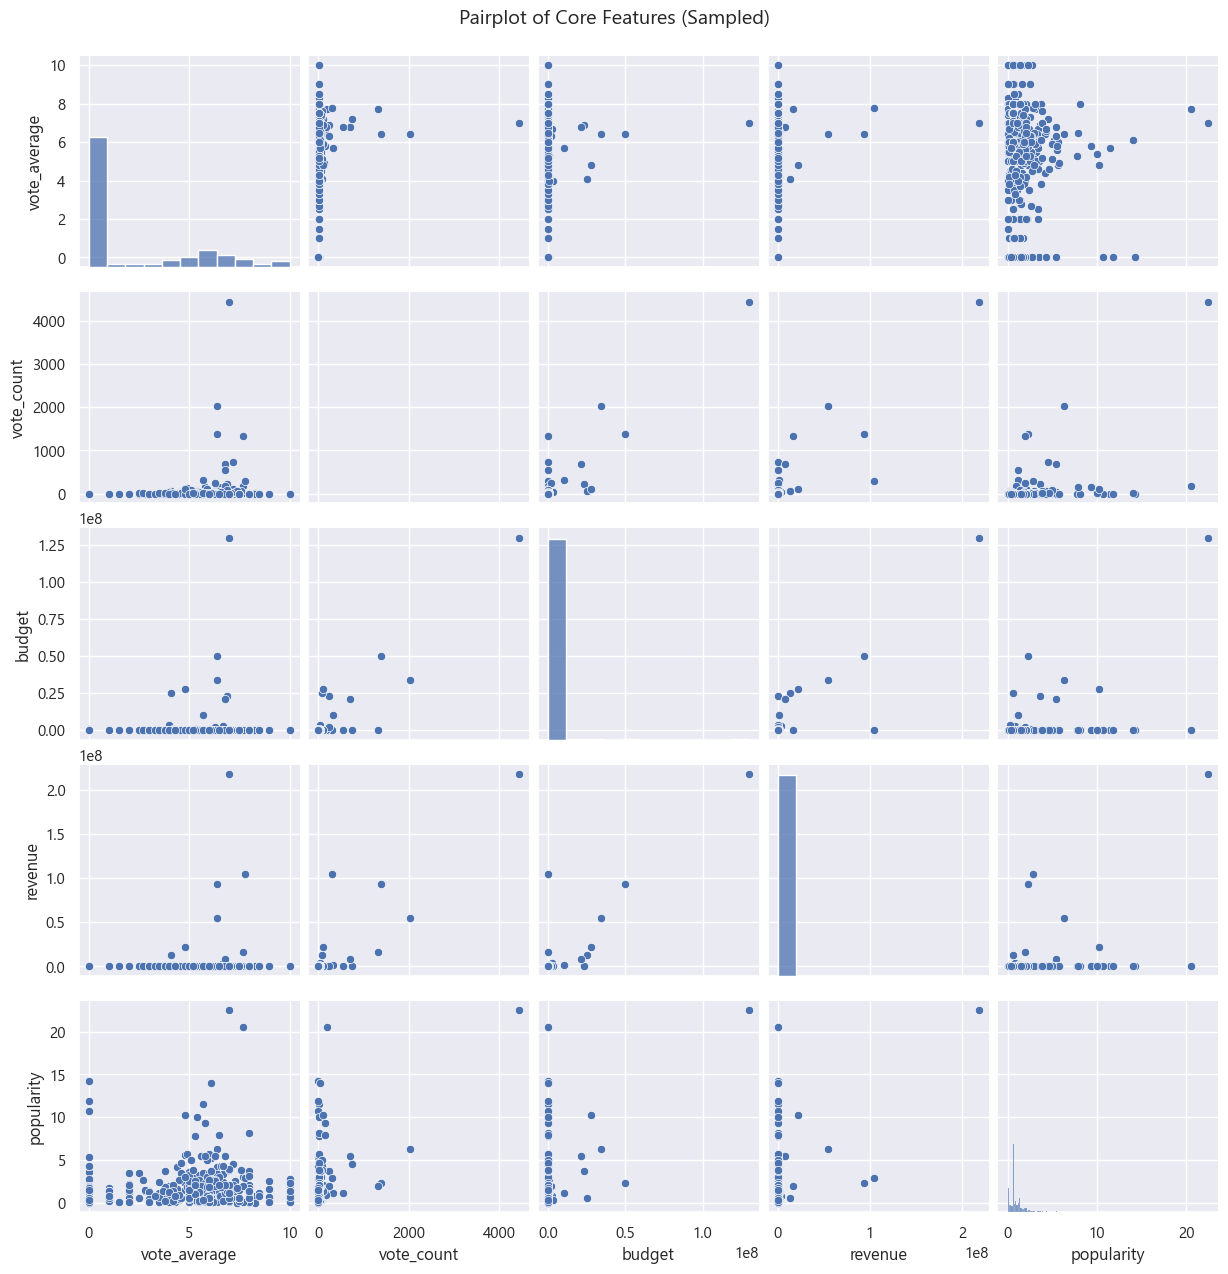

In [22]:
# Sample just 1000 rows for faster visualization
sample_df = df[['vote_average', 'vote_count', 'budget', 'revenue', 'popularity']].dropna().sample(n=1000, random_state=42)
sns.pairplot(sample_df)
plt.suptitle('Pairplot of Core Features (Sampled)', y=1.02)

## 23. Most Used Taglines

Text(0.5, 1.0, 'Word Cloud of Movie Taglines')

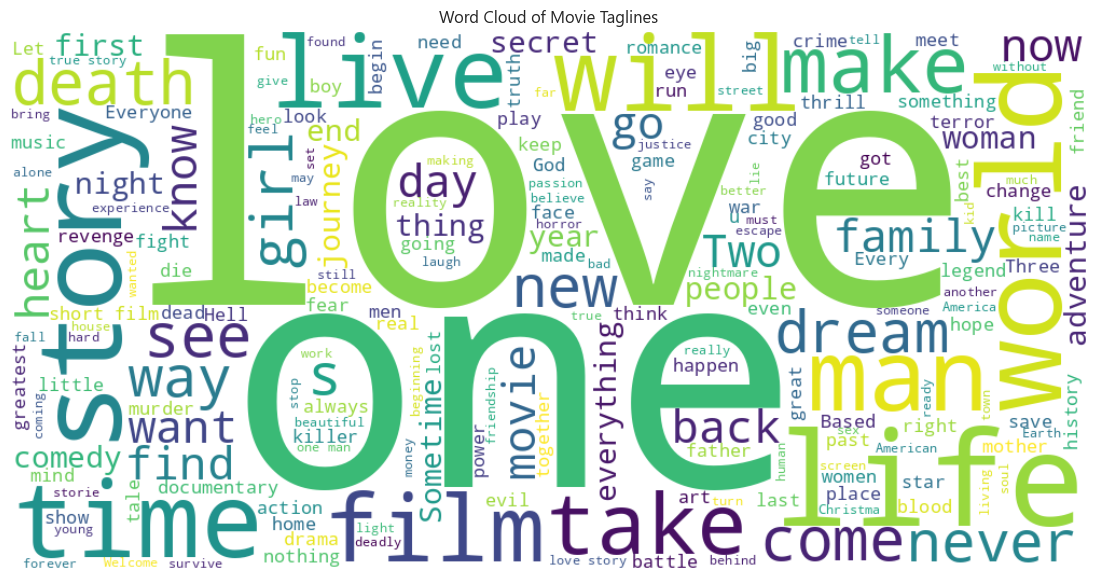

In [23]:
taglines = df['tagline'].dropna()
tag_text = ' '.join(taglines.values)
wordcloud_tagline = WordCloud(width=1000, height=500, background_color='white').generate(tag_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud_tagline, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Taglines')

## 24. Number of Movies by Spoken Languages (Top 10)

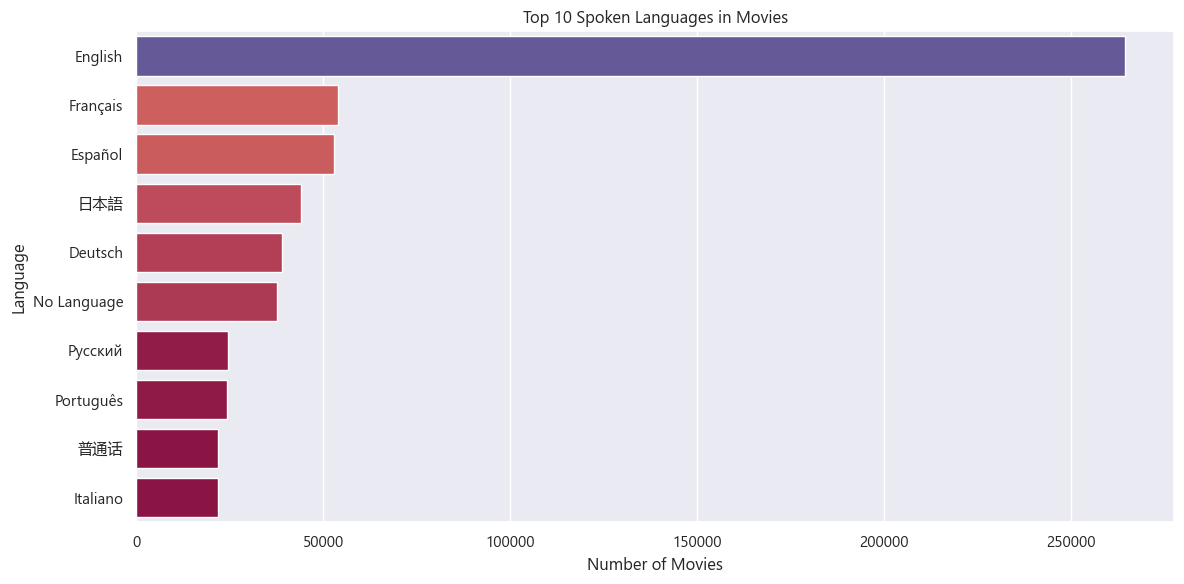

In [24]:
def parse_languages(languages_str):
    if not isinstance(languages_str, str) or languages_str.strip() == "":
        return []
    return [g.strip() for g in languages_str.split(',')]

df['languages_list'] = df['spoken_languages'].apply(parse_languages)
language_counts = df.explode('languages_list')['languages_list'].value_counts().head(10)
sns.barplot(x=language_counts.values, y=language_counts.index, hue=language_counts, palette='Spectral', legend=False)
plt.title('Top 10 Spoken Languages in Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.tight_layout()
plt.show()

## 25. Top Genres in Popular Movies

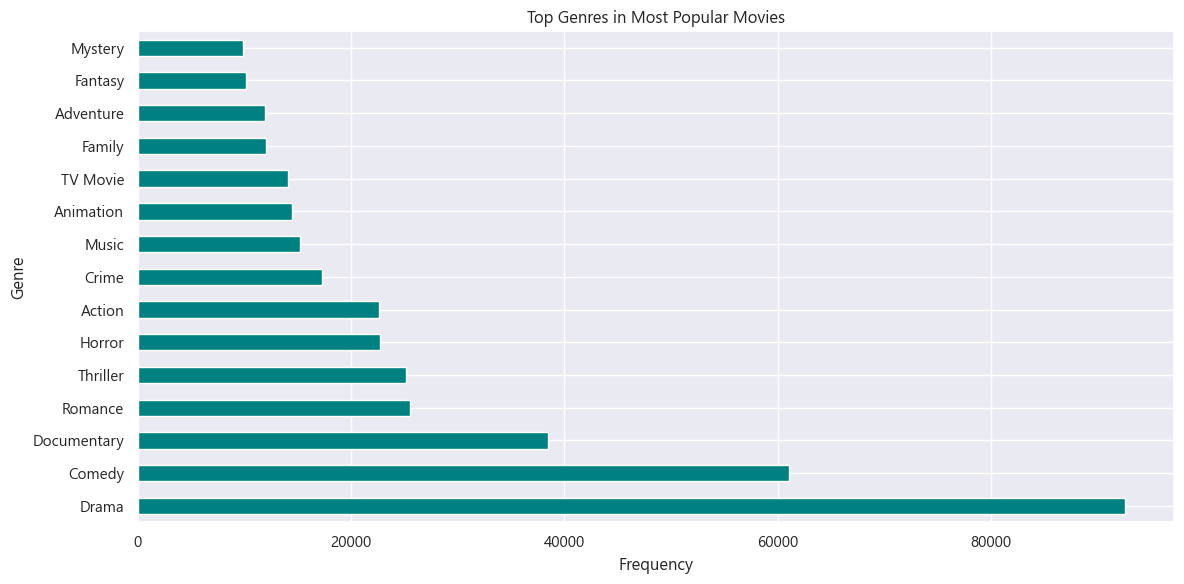

In [25]:
def parse_genres(genres_str):
    if not isinstance(genres_str, str) or genres_str.strip() == "":
        return []
    return [g.strip() for g in genres_str.split(',')]

df['genres_list'] = df['genres'].apply(parse_genres)

popular_movies = df[df['popularity'] > df['popularity'].quantile(0.75)]
popular_genres = popular_movies.explode('genres_list')
top_genres = popular_genres['genres_list'].value_counts().head(15)

top_genres.plot(kind='barh', color='teal')
plt.title('Top Genres in Most Popular Movies')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 26. Most Frequent Directors

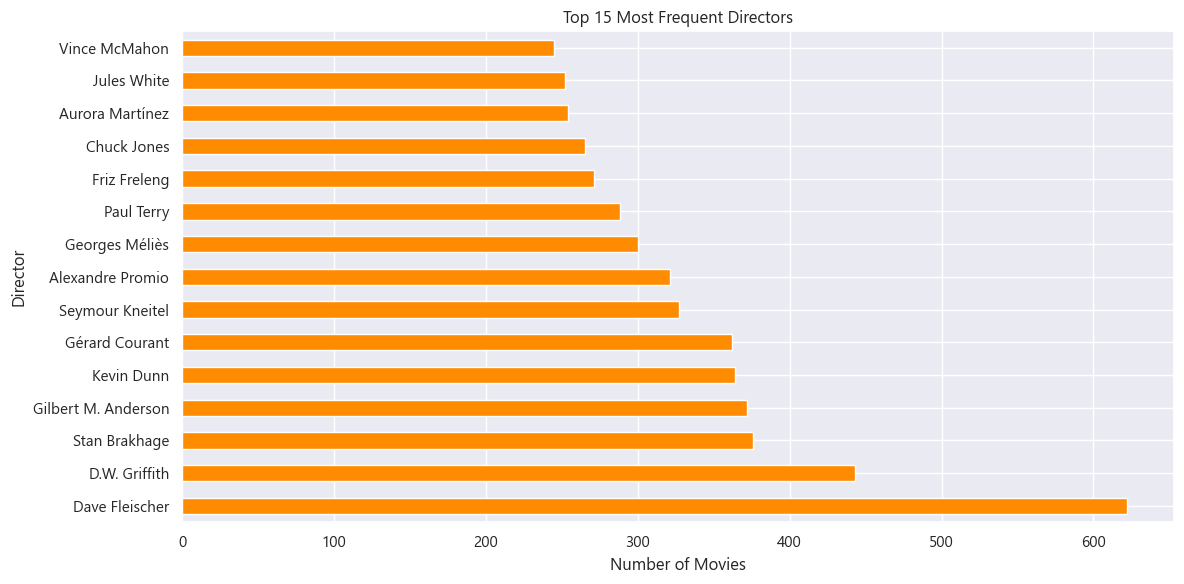

In [26]:
top_directors = df['director'].value_counts().head(15)
top_directors.plot(kind='barh', color='darkorange')
plt.title('Top 15 Most Frequent Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

## 27. Original Language Distribution

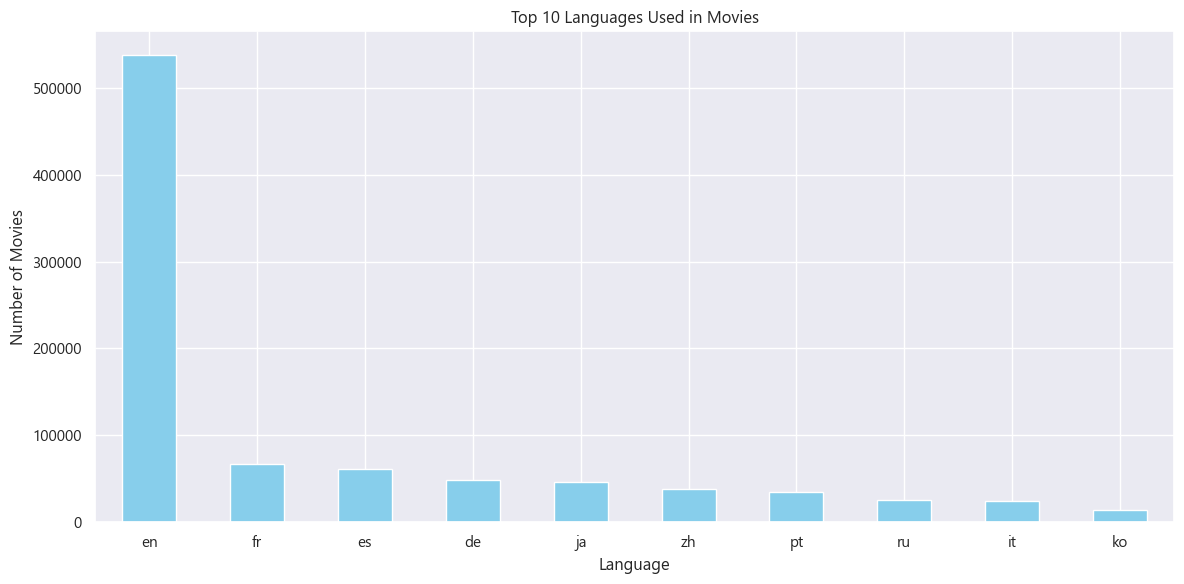

In [27]:
lang_counts = df['original_language'].value_counts().head(10)
lang_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Languages Used in Movies')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()